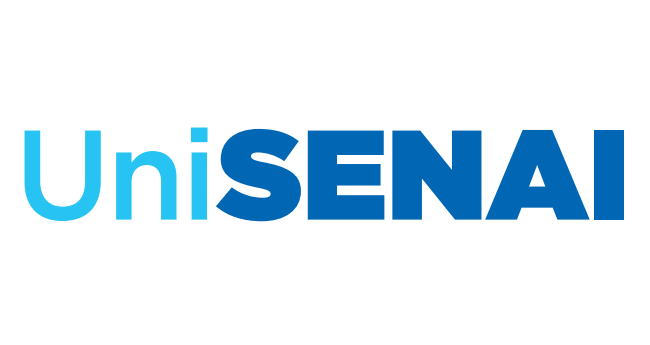
<h1> Pós-Graduação em Ciência de Dados e Inteligência Artificial </h1>

<h1>Unidade Curricular: Tecnologias e Soluções de Big Data</h1>
<h1>Professor: Vinícius Teodoro de Castro Pires, Me.</h1>

<h1><b>Tópico 1 - Manipulações básicas com Spark</b></h1>

Este tópico está dividido nos seguintes sub-tópicos:

1.1 Leitura e estruturação do Dataframe

1.2 Operações

1.3 Filtros

1.4 Agrupamentos e Joins

1.5 Ordenação e Drop

1.6 Completando valores núlos

1.7 Funções de agregação

1.8 Escrita


Os exercícios abaixo tem o intuíto de trabalhar o conhecimento adiquirido no notebook de estudo.

Dataframe das práticas de 1 a 3

O primeiro dataframe é referente ao valor da ação da Apple e contém sete campos:

- **`Date`**: Data do valor da ação
- **`Open`**: Valor de abertura da ação
- **`High`**: Maior valor do dia
- **`Low`**: Menor valor do dia
- **`Close`**: Valor de fechamento
- **`Volume`**: Volume transacionado no dia
- **`Adj Close`**: Valor de fechamento ajustado


# Instalação e inicialização do Spark

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=f59c04bca5944f84cc8e72809f8503f94ab6db104c3fba7f94d33c4a9d5e44b8
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
# Inicializando a sessão do spark
# O master local * é pra usar todas as threads
from pyspark.sql import SparkSession
#importa as funções do pyspark como f
from pyspark.sql import functions as f
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Learning_Spark") \
    .getOrCreate()

In [ ]:
# Faz upload de um arquivo pro colab
from google.colab import files
files.upload()

Saving estudante_nome.csv to estudante_nome.csv
Saving estudante_nota.csv to estudante_nota.csv


{'estudante_nome.csv': b'studentId;name\r\n0;Amet Massa\r\n1;Et Diam\r\n2;Phasellus Pellentesque\r\n3;Phasellus Magna\r\n4;Proin Enim\r\n5;\r\n6;Iaculis Fringilla\r\n7;Est Urna\r\n8;Eu Eros\r\n9;Aliquet Sagittis\r\n10;Sapien Eros\r\n11;Viverra Senectus\r\n12;Tortor Commodo\r\n13;A Vitae\r\n14;a Ultrices\r\n15;Lorem Iaculis\r\n16;a Eget\r\n17;Egestas Eu\r\n18;Posuere Donec\r\n19;Viverra Donec\r\n20;Condimentum Sed\r\n21;Eleifend Pharetra\r\n22;a Diam\r\n23;Scelerisque\r\n24;At Scelerisque\r\n25;Lacus Vitae\r\n26;Elementum Sollicitudin\r\n27;Diam Venenatis\r\n28;Diam A\r\n29;Posuere Sed\r\n30;Sagittis Eu\r\n31;Mattis Facilisi\r\n32;\r\n33;Vitae Rhoncus\r\n34;Facilisi Fermentum\r\n35;Aliquet Sodales\r\n36;Bibendum Id\r\n37;Fringilla Risus\r\n38;\r\n39;Magna Odio\r\n40;Dignissim A\r\n41;Sapien Posuere\r\n42;Donec Volutpat\r\n43;Elementum Urna\r\n44;Elementum Lectus\r\n45;Amet Vitae\r\n46;Ac Vitae\r\n47;Quis Et\r\n48;Vel Facilisis\r\n49;Fames Quis\r\n50;\r\n51;Non Dolor\r\n52;Nibh Sed\r\n53

# Prática 1


- Leia o dataframe "stocks_appl_p1.csv", inferindo automaticamente o schema do dado e considerando o header.
- Apresente o Schema do dado
- Apresente um resumo estatístico do dado
- Conte o número de datas distintas.
- Selecione e apresente somente as colunas de data e volume
- Apresente o Dataframe ordenado pelo valor de abertura de maneira ascendente

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-01-04,213.429998,214.499996,212.380001,214.009998,123432400,27.727039
1,2010-01-05,214.599998,215.589994,213.249994,214.379993,150476200,27.774976
2,2010-01-06,214.379993,215.230000,210.750004,210.969995,138040000,27.333178
3,2010-01-07,211.750000,212.000006,209.050005,210.580000,119282800,27.282650
4,2010-01-08,210.299994,212.000006,209.060005,211.980005,111902700,27.464034
5,2010-01-11,212.799997,213.000002,208.450005,210.110003,115557400,27.221758
6,2010-01-12,209.189995,209.769995,206.419998,207.720001,148614900,26.912110
7,2010-01-13,207.870005,210.929995,204.099998,210.650002,151473000,27.291720
8,2010-01-14,210.110003,210.459997,209.020004,209.430000,108223500,27.133657
9,2010-01-15,210.929995,211.599997,205.869999,205.930000,148516900,26.680198


+-------+------------------+-----------------+------------------+------------------+-------------------+------------------+
|summary|              Open|             High|               Low|             Close|             Volume|         Adj Close|
+-------+------------------+-----------------+------------------+------------------+-------------------+------------------+
|  count|              1763|             1763|              1764|              1762|               1764|              1763|
|   mean| 312.9740443908112|315.8032498468515|309.60838422732445| 312.9265264795685|9.414480890022676E7|  75.0246102875781|
| stddev|185.29583187280173|186.8999844415609|183.39607279725456|185.14767654375578|6.021959863501013E7|28.582953725161772|
|    min|              90.0|        90.699997|         89.470001|         90.279999|           11475900|         24.881912|
|    max|        702.409988|       705.070023|        699.569977|        702.100021|          470249500|127.96609099999999|
+-------

1763

+--------------------+
|count(DISTINCT Date)|
+--------------------+
|                1762|
+--------------------+



+----------+---------+
|      Date|   Volume|
+----------+---------+
|2010-01-04|123432400|
|2010-01-05|150476200|
|2010-01-06|138040000|
|2010-01-07|119282800|
|2010-01-08|111902700|
|2010-01-11|115557400|
|2010-01-12|148614900|
|2010-01-13|151473000|
|2010-01-14|108223500|
|2010-01-15|148516900|
|2010-01-19|182501900|
|2010-01-20|153038200|
|2010-01-21|152038600|
|2010-01-22|220441900|
|2010-01-25|266424900|
|2010-01-26|466777500|
|2010-01-27|430642100|
|2010-01-28|293375600|
|2010-01-29|311488100|
|2010-02-01|187469100|
+----------+---------+
only showing top 20 rows



In [ ]:
# Apresente o Dataframe ordenado pelo valor de abertura de maneira ascendente

+----------+---------+-----------------+---------+-----------------+---------+-----------------+
|      Date|     Open|             High|      Low|            Close|   Volume|        Adj Close|
+----------+---------+-----------------+---------+-----------------+---------+-----------------+
|2016-01-13|     NULL|       101.190002|97.300003|        97.389999| 62439600|        94.859047|
|2016-05-13|     90.0|91.66999799999999|     90.0|        90.519997| 44392800|89.18571700000001|
|2014-06-25|90.209999|        90.699997|89.650002|        90.360001| 36869000|        85.737201|
|2014-06-26|90.370003|        91.050003|89.800003|        90.900002| 32629000|        86.249576|
|2014-06-24|    90.75|        91.739998|90.190002|        90.279999| 39036000|        85.661292|
|2014-06-27|    90.82|             92.0|90.769997|        91.980003| 64029000|        87.274325|
|2014-06-23|    91.32|        91.620003|90.599998|90.83000200000001| 43694000|        86.183157|
|2014-06-16|91.510002|        

# Prática 2

- Leia o dataframe "stocks_appl.csv", criando um schema igual ao inferido no exercício anterior.
- Conte quantas linhas não possuem pelo menos um valor nulo
- Conte quantas colunas não possuem todos os dados nulos
- Preencha as colunas com a média, para os campos com valores inteiros e double.
- Drope as linhas com colunas de data nulas, ordene para mostrar que as colunas foram removidas.

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [ ]:
# Conte quantas linhas não possuem pelo menos um valor nulo


1759

In [ ]:
# Conte quantas colunas não possuem todos os dados nulos


1764

In [ ]:
# Preencha as colunas com a média, para valores os campos de abertura, fechamento, máximo e minimo


315.8032498468515

In [ ]:
# Drope as linhas com colunas de data nulas, ordene para mostrar que as colunas foram removidas.


+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

# Prática 3

Usando o dataframe da etapa anterior, realize as seguintes tarefas:
- Crie uma coluna com a diferença percentual entre as colunas de abertura e fechamento
- Apresente o dataframe ordenado pela diferença percentual de maneira descendente
- Filtre as linhas com delta diário positivo entre os anos de 2011 e 2013 e atribua a um novo dataframe
- Apresente o máximo e minimo da data para validar sua operação, os valores apresentados deverão ser 2012-12-31 e 2011-01-03, respectivamente.
- Apresente o percentil 0.25, 0.5 e 0.75 do delta.
- Apresente os mesmos valores de percentil para a mesma data, porém, sem o filtro de delta diário.

In [ ]:
# Crie uma coluna com a diferença percentual entre as colunas de abertura e fechamento


+----------+------------------+------------------+------------------+------------------+---------+------------------+-------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|       delta_diario|
+----------+------------------+------------------+------------------+------------------+---------+------------------+-------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039| 0.2717518649838553|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|-0.1025186402844156|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|-1.5906325736282696|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|-0.5525383707201854|
|2010-01-08|        210.299994|   

In [ ]:
# Apresente o dataframe ordenado pela diferença percentual de maneira descendente


+----------+------------------+------------------+------------------+------------------+---------+------------------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|      delta_diario|
+----------+------------------+------------------+------------------+------------------+---------+------------------+------------------+
|2015-08-24|         94.870003|        108.800003|              92.0|        103.120003|162206300|        100.012029| 8.696110191964479|
|2012-04-17|         578.93998|        610.000023|        571.910019|        609.699989|256382000|         78.992457| 5.313160269221683|
|2012-05-21|        534.499977| 561.5400089999999|         534.04998|        561.279976|157776500| 72.71918199999999| 5.010290019151881|
|2012-11-19|        540.709999| 567.4999849999999| 539.8800200000001|        565.730011|205829400|         73.946626| 4.627251585188446|
|2012-12-31|        510.529976|        53

In [ ]:
# Filtre as linhas com delta diário positivo entre os anos de 2011 e 2013 e atribua a um novo dataframe
# Apresente o máximo e minimo da data para validar sua operação, os valores apresentados deverão ser 201-12-31 e 2011-01-03, respectivamente.

+----------+----------+
| max(Date)| min(Date)|
+----------+----------+
|2012-12-31|2011-01-03|
+----------+----------+



In [ ]:
# Apresente o percentil 0.25, 0.5 e 0.75 do delta.


+--------------------------------------------+-------------------------------------------+--------------------------------------------+
|percentile_approx(delta_diario, 0.25, 10000)|percentile_approx(delta_diario, 0.5, 10000)|percentile_approx(delta_diario, 0.75, 10000)|
+--------------------------------------------+-------------------------------------------+--------------------------------------------+
|                          0.3908732084919393|                         0.8277919916834406|                          1.3692307204004095|
+--------------------------------------------+-------------------------------------------+--------------------------------------------+



In [ ]:
# Apresente os mesmos valores de percentil para a mesma data, porém, sem o filtro de delta diário.

+--------------------------------------------+-------------------------------------------+--------------------------------------------+
|percentile_approx(delta_diario, 0.25, 10000)|percentile_approx(delta_diario, 0.5, 10000)|percentile_approx(delta_diario, 0.75, 10000)|
+--------------------------------------------+-------------------------------------------+--------------------------------------------+
|                         -0.9097846743316325|                       -0.02666404977918546|                          0.8127244318402234|
+--------------------------------------------+-------------------------------------------+--------------------------------------------+



Dataframes das práticas 4 e 5

O primeiro dataframe contém dois campos:
- **`studentId`**: Id do estudante
- **`name`**: Nome do estudante

O segundo dataframe contém três campos:
- **`studentId`**: Id do estudante
- **`class`**: Classe do estudante
- **`rating`**: Nota do estudante


# Prática 4

Leia os dois arquivos csv **`estudante_nome.csv`**, **`estudante_nota.csv`** e realize as seguintes tarefas
- Faça um outer join  na coluna de id do estudante
- Remova as linhas que possuem menos de 3 colunas não nulas.
- Ordene pela coluna nota em ordem descendente com os nulos primeiros.
- Conte quantos alunos da classe 'C' tem nota maior que 8.

In [ ]:
# Faça um outer join na coluna de id do estudante


,studentId,class,rating
0,0,A,9
1,1,C,8
2,2,C,6
3,3,None,9
4,4,A,8
5,5,C,6
6,6,B,8
7,7,C,8
8,8,B,9
9,9,C,8


,studentId,name,class,rating
0,0,Amet Massa,A,9
1,1,Et Diam,C,8
2,2,Phasellus Pellentesque,C,6
3,3,Phasellus Magna,None,9
4,4,Proin Enim,A,8
5,5,None,C,6
6,6,Iaculis Fringilla,B,8
7,7,Est Urna,C,8
8,8,Eu Eros,B,9
9,9,Aliquet Sagittis,C,8


In [ ]:
# Remova as linhas que possuem menos de 3 colunas não nulas.
# Count de dados totais


300

In [ ]:
# Count de dados pós remoção

In [ ]:
# Ordene pela coluna nota em ordem descendente com os nulos primeiros.


+---------+----------------+-----+------+
|studentId|            name|class|rating|
+---------+----------------+-----+------+
|      152|Lacinia Habitant|    C|  NULL|
|      258|        Dui Orci|    C|  NULL|
|      267|          A Diam|    B|  NULL|
|       46|        Ac Vitae| NULL|     9|
|      137|  Tristique Amet|    A|     9|
|       58|     Vitae Lacus| NULL|     9|
|        3| Phasellus Magna| NULL|     9|
|       59|        Eros Vel|    C|     9|
|       11|Viverra Senectus| NULL|     9|
|       60|   Eleifend Enim|    C|     9|
|       23|     Scelerisque|    C|     9|
|       68|        Id Magna|    B|     9|
|       33|   Vitae Rhoncus|    A|     9|
|       72|            NULL|    C|     9|
|       97|  Tristique Nibh|    C|     9|
|       99|  Quam Venenatis|    A|     9|
|        0|      Amet Massa|    A|     9|
|      102|            NULL|    C|     9|
|       22|          a Diam|    B|     9|
|      109|          Sed Id|    A|     9|
+---------+----------------+-----+

In [ ]:
# Conte quantos alunos da classe 'C' tem nota maior que 8.


29

In [ ]:
# Show

+---------+--------------------+-----+------+
|studentId|                name|class|rating|
+---------+--------------------+-----+------+
|       23|         Scelerisque|    C|     9|
|       36|         Bibendum Id|    C|     9|
|       59|            Eros Vel|    C|     9|
|       60|       Eleifend Enim|    C|     9|
|       72|                NULL|    C|     9|
|       73|Pellentesque Elem...|    C|     9|
|       89|        In Phasellus|    C|     9|
|       94|          Risus Diam|    C|     9|
|       97|      Tristique Nibh|    C|     9|
|      102|                NULL|    C|     9|
|      111|      Nunc Elementum|    C|     9|
|      124|          Sem Lectus|    C|     9|
|      173|      Ultrices Purus|    C|     9|
|      202|  Ullamcorper Cursus|    C|     9|
|      203|             Id Arcu|    C|     9|
|      207|         Dolor Massa|    C|     9|
|      220|Vulputate Condime...|    C|     9|
|      221|     Morbi Fringilla|    C|     9|
|      223|         Et Lobortis|  

# Pratica 5


Usando o mesmo dataframe do exercício anterior faça as seguintes operações

- Agrupe por classe e faça a média, o minímo e o máximo das notas dos estudantes, colocando os respectivos alias 'media_nota', 'minimo_nota', 'maximo_nota'.
- Agrupe por classe e conte quantos alunos cada classe possuí com nota inferior a 7
- Agrupe por classe e conte quantos alunos cada classe possuí com nota superior a 8
- Indique a proporção de alunos com nota menor que 7 para cada classe (Sem a função de collect ou o uso de números fixos para divisão pelo total de cada classe).

In [ ]:
# Agrupe por classe e faça a média, o minímo e o máximo das notas dos estudantes, colocando os respectivos alias 'media_nota', 'minimo_nota', 'maximo_nota'.

,class,media_nota,minimo_nota,maximo_nota
0,None,7.655172,6,9
1,B,7.301887,6,9
2,C,7.525926,6,9
3,A,7.428571,6,9


In [ ]:
# Agrupe por classe e conte quantos alunos cada classe possuí com nota inferior a 7


,class,count(1)
0,None,6
1,B,15
2,C,35
3,A,22


In [ ]:
# Agrupe por classe e conte quantos alunos cada classe possuí com nota superior a 8


,class,count(1)
0,None,9
1,B,8
2,C,29
3,A,17


,class,total_estudantes
0,None,29
1,B,54
2,C,137
3,A,77


,class,nota_menor_que_7
0,None,6
1,B,15
2,C,35
3,A,22


,class,nota_menor_que_7,total_estudantes
0,B,15,54
1,C,35,137
2,A,22,77


In [ ]:
# Indique a proporção de alunos com nota menor que 7 para cada classe (Sem a função de collect ou o uso de números fixos para divisão pelo total de cada classe).

,class,nota_menor_que_7,total_estudantes,proporcao_nota_menor_que_7
0,B,15,54,0.277778
1,C,35,137,0.255474
2,A,22,77,0.285714


# Desafio 1

- Usando o dataframe de ações, agrupe por mês e apresente ordenado por mês a média mensal do valor de abertura da ação.

,month(Date),avg(Open)
0,12,302.769531
1,1,322.906286
2,6,288.751667
3,3,332.889347
4,5,351.598708
5,9,301.359097
6,4,341.004863
7,8,300.205742
8,7,281.248783
9,10,308.557172


# Desafio 2

Usando o dataframe de estudantes, após o join, conte quantas colunas possuem pelo um número nulo sem fazer o count total do dataframe.

+---------+----+-----+------+
|studentId|name|class|rating|
+---------+----+-----+------+
|        0|  20|   31|     4|
+---------+----+-----+------+

